In [19]:
#print('Image Noise Reduction with Autoencoders')
#print('===>>>Firstly we will load the libraries that we need in this project:')

import numpy as np
import matplotlib

#print('we are using mnist dataset;so lets import it')

from tensorflow.keras.datasets import mnist

#print('In this dataset we have 60000 examples as Training set and 10000 examples as test set')
#print('All the images are Handwritten and black&white in color,each of size 28x28')
#print('we have labels as digits from 0-9')

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model

#print('Now I will import layers,as I am going to create 2 Neural networks')
#print('1.first neural network,will classify the handwritten examples')
#print('2.second neural network,will denoise the input data and as a result we will see denoised images')

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical


%matplotlib inline

In [20]:
#print('===>>>lets process the data:')
#print('load the data from mnist dataset')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print('actual pixels range is (0-255)')
#print('normalize the values in the range (0-1)')
#print('we are dividing by 255 as it is the maximum pixel value')

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

#print('training set:60000 examples with 28x28(784) ')

x_train = np.reshape(x_train, (60000, 784))

#print('test set:10000 examples with 28x28(784)')

x_test = np.reshape(x_test, (10000, 784))

In [21]:
#print('let us add noise to the dataset as it contains no noise')
#print('scaling is performed by multiplying with 0.9')

x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9

#print('0. and 1. actually represents floating point values')

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

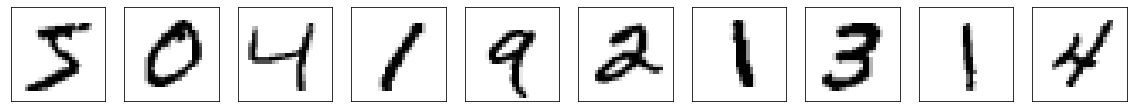

In [22]:
#print('lets now create a plot func to plot the images')
#print('by default we are making labels as false unless mentioned')

def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    #lets try to plot 10 images
    for i in range(10):
        plt.subplot(1,10,i+1)
        #1 row,10 col,index starts by one so add 1 to i
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        #we already flattend ,so reshape into 28x28
        #here cmap is set to 'binary' to see black and white images
        #removing xticks and yticks
        plt.xticks([])
        plt.yticks([])
        #if labels is set to true ,then labels are printed below the images
        #if predictions are passed,those will be displayed as labels of images
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()   #to display entire plot
    return
plot(x_train, None) #lets print the training images

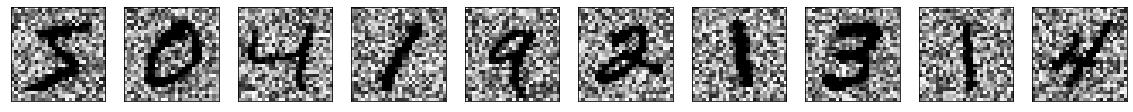

In [23]:
plot(x_train_noisy, None) #lets print the images to which we added noise

In [24]:
#now we will build a classifier and train it
#we will be using two dense layers here with 256 nodes each and activation as 'rectified linear unit'
#in output layer we will be having 10 nodes which actually says what label and for activation we use 'softmax' as we will have probabilities 
#Sequential is as class from Keras

classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# here we will use optimizer='adam' which means adapter momentum estimate
#it just works like RMS where momentum is added to that

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

print('classifier is trained on the training dataset')

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4270 - accuracy: 0.8807
Epoch 2/3
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1577 - accuracy: 0.9539
Epoch 3/3
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1053 - accuracy: 0.9693
classifier is trained on the training dataset


In [25]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.1014 - accuracy: 0.9705
0.9705


In [26]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 12.0658 - accuracy: 0.1299
0.1299


In [27]:
#autoencoder
#takes noisy data as input
input_image = Input(shape=(784,))

#here we used 64 because our autoencoder should focus only on the important stuff
#it should ignore the data that is not important

encoded = Dense(64, activation='relu')(input_image)
 
    #values are converged to 0 and 1 ,so now lets use sigmoid as activation 
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
#train auto encoder
#batchsize is 512 as it will speed up the training process

autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Hurray we have completed trainig!')

0.255 _ 0.215 _ 0.189 _ 0.176 _ 0.167 _ 0.159 _ 0.151 _ 0.145 _ 0.140 _ 0.136 _ 0.132 _ 0.129 _ 0.126 _ 0.124 _ 0.122 _ 0.120 _ 0.118 _ 0.116 _ 0.115 _ 0.114 _ 0.112 _ 0.112 _ 0.111 _ 0.110 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _  _ 
Hurray we have completed trainig!


In [29]:
#lets see the denoised images
preds = autoencoder.predict(x_test_noisy)

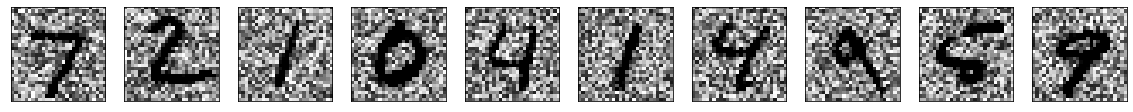

In [30]:
plot(x_test_noisy, None) #noisy images

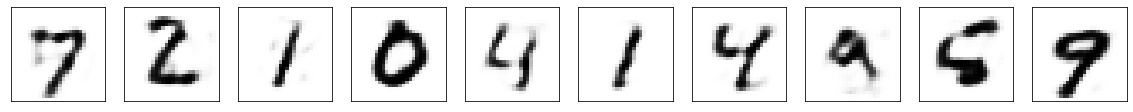

In [31]:
plot(preds, None) #denoised images

In [32]:
loss, acc = classifier.evaluate(preds, y_test)
print(acc)
#now we have accuracy greater than 94

10000/10000 [==============================] - 0s 48us/sample - loss: 0.1722 - accuracy: 0.9450
0.945


In [33]:
#let us create a composite model
input_image=Input(shape=(784,))
x=autoencoder(input_image)
y=classifier(x)
denoise_and_classify=Model(input_image,y) #model

In [34]:
predictions=denoise_and_classify.predict(x_test_noisy)

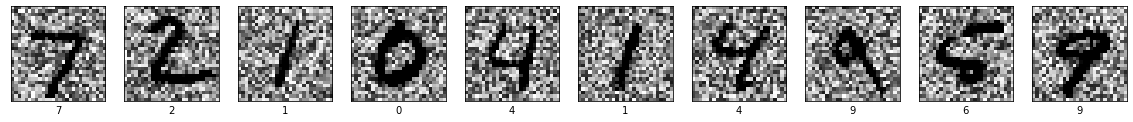

In [35]:
plot(x_test_noisy,predictions,True)

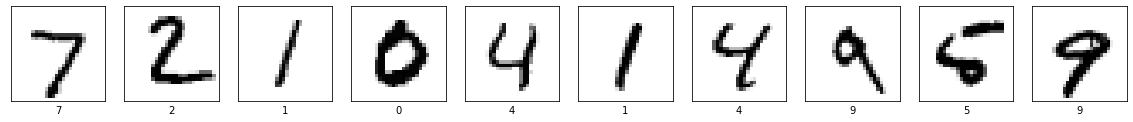

In [36]:
plot(x_test,to_categorical(y_test),True)